- Il dataset non ha i valori di i e p per ogni GRB (ci sono alcuni che hanno solo i e non p)
- Il modello ha dei problemi in quanto ci sono molti più z piccoli (<5) di z grandi (>5) quindi separando il dataset in dati di training e testing succede spesso che nel training non siano presenti (o siano presenti in proporzione estremamente minore) i valori di z > 5. Per questo motivo il modello non riesce ad allenarsi a predire quei valori, ed il risultato è una sottostima di quei valori quando si comparano le predizioni con i valori di test. Ci sono 2 possibili soluzioni: o si tagliano i valori di redshift che vanno oltre un particolare valore, oppure si usa un metodo "stratify" nel separare il dataset in training e testing data. Nello specifico si separano le GRBs in 2 (o più) classi in base al loro valore di z (per esempio classe 0 per z < 5 e classe 1 per z > 5) e si separano i dati in training e testing data in modo tale che la proporzione tra classe 0 e classe 1 che si aveva nel dataset iniziale rimanga tale sia per i dati di training che per quelli di testing.
Entrambi i metodi sono stati testati e si è notato che con questi due approcci i risultati migliorano notevolmente nella stabilità del modello, inoltre tra i due non ci sono differenze sostanziali nei risultati, ragion per cui ritengo possa essere usato il metodo stratify in modo da non fare a meno di dati che possano permettere la predizione di redshift maggiori.
- Con i logaritmi si ottengono risultati ancora leggermente migliori.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ML_GRB import ML_GRB

In [3]:
dir_path = ''       # directory path

GRB = ML_GRB()      # initializing the main class ---> see ML_GRB.py
GRB.DataReading(dir_path)       # reading the data ---> see functions.py

GRB.DatasetExtrapolation()      # creating the dataset ---> see function.py
dataset = GRB.dataset       # saving the dataset in a variable

In [4]:
df = GRB.spectral_data_I

# Splitting the dataset in i and p
df_i = df[(df['SType'] == 'i')].reset_index(drop=True)
df_p = df[(df['SType'] == 'p')].reset_index(drop=True)

# Removing from "i data" the GRBs that are not in "p data" (Because the "i GRBs Dataset" is bigger than the
# "p GRBs Dataset").
# Creating a mask to mark if the i-th element is in the "p dataframe"
condictions = []

grbs = []
temp = []
for i in df_i['ID']:
    condiction = i in df_p['ID'].values
    condictions.append(condiction)
    if condiction == False:
        temp.append(0)
        grbs.append(i)
        
unique_list = list(set(grbs))
print("The list after removing duplicates:", unique_list)
print('\n # GRBs: ', len(unique_list))

The list after removing duplicates: ['GRB110731A', 'GRB070714B', 'GRB060121', 'GRB041006', 'GRB080514B', 'GRB130701A', 'GRB080602', 'GRB100816A', 'GRB080413B', 'GRB101213A', 'GRB101219A', 'GRB971214', 'GRB100206A', 'GRB140506A', 'GRB071112C', 'GRB071010B', 'GRB140808A', 'GRB090812', 'GRB160629A', 'GRB000301C', 'GRB071117', 'GRB130408A', 'GRB060912A', 'GRB150514A', 'GRB091020', 'GRB150424A', 'GRB120804A', 'GRB160410A', 'GRB061201', 'GRB020819B', 'GRB050922C', 'GRB130603B', 'GRB021211', 'GRB140606B', 'GRB071020', 'GRB081121', 'GRB040924', 'GRB071227']

 # GRBs:  38


In [10]:
df = GRB.spectral_data_II

# Splitting the dataset in i and p
df_i = df[(df['SType'] == 'i')].reset_index(drop=True)
df_p = df[(df['SType'] == 'p')].reset_index(drop=True)

# Removing from "i data" the GRBs that are not in "p data" (Because the "i GRBs Dataset" is bigger than the
# "p GRBs Dataset").
# Creating a mask to mark if the i-th element is in the "p dataframe"
condictions = []

grbs = []
temp = []
for i in df_i['ID']:
    condiction = i in df_p['ID'].values
    condictions.append(condiction)
    if condiction == False:
        temp.append(0)
        grbs.append(i)
        
unique_list = list(set(grbs))
print("The list after removing duplicates:", unique_list)
print('\n # GRBs: ', len(unique_list))

The list after removing duplicates: ['GRB060801', 'GRB091109A', 'GRB131227A', 'GRB050724', 'GRB160121A', 'GRB080906', 'GRB080430', 'GRB140907A', 'GRB050904', 'GRB080707', 'GRB070208', 'GRB100901A', 'GRB081029', 'GRB170531B', 'GRB071021', 'GRB090519', 'GRB070810A', 'GRB140311A', 'GRB091029', 'GRB090814A', 'GRB130131B', 'GRB161219B', 'GRB160327A', 'GRB080604', 'GRB050730', 'GRB100316B', 'GRB060526', 'GRB171205A', 'GRB091018', 'GRB100728B', 'GRB111225A', 'GRB060729', 'GRB100316A', 'GRB090426', 'GRB080515', 'GRB130511A', 'GRB151215A', 'GRB131004A', 'GRB080516', 'GRB080913', 'GRB070611', 'GRB060223A', 'GRB140614A', 'GRB060116', 'GRB090429B', 'GRB171020A', 'GRB061110B', 'GRB110726A', 'GRB121024A', 'GRB120722A', 'GRB150910A', 'GRB080129', 'GRB090113', 'GRB140423A', 'GRB070110', 'GRB121211A', 'GRB130427B']

 # GRBs:  57


In [6]:
a, b = GRB.energetic_data_I, GRB.energetic_data_II

print('Total # of GRBs', len(a) + len(b))

print('# GRBs in the final dataset', len(dataset))

Total # of GRBs 317
# GRBs in the final dataset 222


In [7]:
(57 + 38) - (317 - 222)

0

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from scipy import stats
from ML_GRB import ML_GRB, RND_FOREST

GRB = ML_GRB()
GRB.DataReading('')
GRB.DatasetExtrapolation()

dataset = GRB.dataset

model = RND_FOREST()
GRB.SetModel(model)     # Setting the model in the main class

keys = []
for i in dataset['z']:
    if (i <= 5):
        keys.append(0)
        
    elif (i > 5):
        keys.append(1)
        
keys_arr = np.array(keys)

dataset['z'] = np.log10(1 + dataset['z'])
dataset[['DeltaT', 'Ep_i', 'F_i', 'Ep_p', 'F_p']] = np.log10(dataset[['DeltaT', 'Ep_i', 'F_i', 'Ep_p', 'F_p']])  

# Fitting the model ---> see functions.py
GRB.model.Run(dataset, train_size = 0.8, stratify=keys_arr, 
              n_estimators = 500, max_depth = 13)

y_train_pred = GRB.model.forest.predict(GRB.model.X_train)

z_train_list = []
z_train_pred_list = []
z_test_list = []
z_pred_list = []
for test, pred, train, train_pred in zip(GRB.model.y_test, GRB.model.y_pred, GRB.model.y_train, y_train_pred):
       z_test = 10**test - 1
       z_pred = 10**pred - 1
       z_train = 10**train - 1
       z_train_pred = 10**train_pred - 1
       z_test_list.append(z_test)
       z_pred_list.append(z_pred)
       z_train_list.append(z_train)
       z_train_pred_list.append(z_train_pred)

# Computing the results
correlation_coefficient, p_value = stats.pearsonr(z_test_list, z_pred_list)
mape = mean_absolute_percentage_error(z_test_list, z_pred_list)

# Plotting predictions vs test data
fig, ax = plt.subplots(1,2)
ax[0].set(title = 'Test Results', 
       xlabel = 'z observed', 
       ylabel = 'z predicted')
ax[1].set(title = 'Train Results', 
       xlabel = 'z observed', 
       ylabel = 'z predicted')

ax[0].scatter(z_test_list, z_pred_list, color='k', marker='.', label='model results')
ax[1].scatter(z_train_list, z_train_pred_list, color='k', marker='.', label='model results')

# Plotting a bisector that act as an ideal model
x_values1 = np.linspace(0, max(z_test_list), 100)
x_values2 = np.linspace(0, max(z_train_list), 100)
ax[0].plot(x_values1, x_values1, color='0.6', linestyle = '--', label='ideal model')
ax[1].plot(x_values2, x_values2, color='0.6', linestyle = '--', label='ideal model')


ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.show()
    
# Printing the results
print('The correlation r is : {:.5f} and the p-value is {:.5f} while the MAPE is: {:.5f}'.format(correlation_coefficient, p_value, mape))

#-----------------------------------------------------------------------------------------------------#

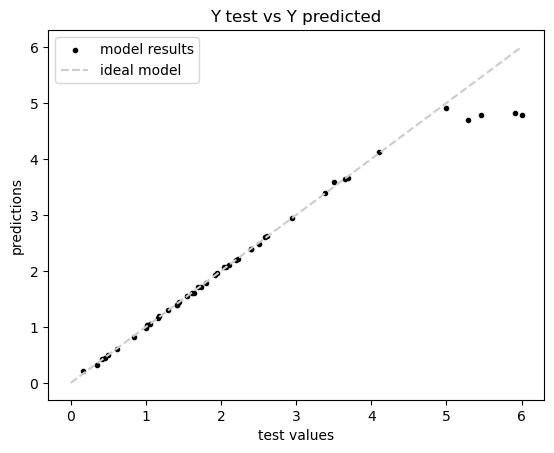

The correlation r is : 0.98976 while the MAPE is: 0.02862


In [8]:
from ML_GRB import RND_FOREST
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_percentage_error

# Inizialising the model class ---> see ML_GRB.py
model = RND_FOREST()
GRB.SetModel(model)     # Setting the model in the main class

# Fitting the model ---> see functions.py
GRB.model.Run(dataset, train_size = 0.8, random_state = 3, 
              n_estimators = 100, max_depth = 7)

# Computing the results
r_score, _ = pearsonr(GRB.model.y_test, GRB.model.y_pred)
mape = mean_absolute_percentage_error(GRB.model.y_test, GRB.model.y_pred)

# Plotting predictions vs test data
fig, ax = plt.subplots()
ax.set(title = 'Y test vs Y predicted', 
       xlabel = 'test values', 
       ylabel = 'predictions')

ax.scatter(GRB.model.y_test, GRB.model.y_pred, color='k', marker='.', label='model results')

# Plotting a bisector that act as an ideal model
x_values = np.linspace(0, max(GRB.model.y_test), 100)
ax.plot(x_values, x_values, color='0.8', linestyle = '--', label='ideal model')

ax.legend(loc='best')
plt.show()
    
# Printing the results
print('The correlation r is : {:.5f} while the MAPE is: {:.5f}'.format(r_score, mape))

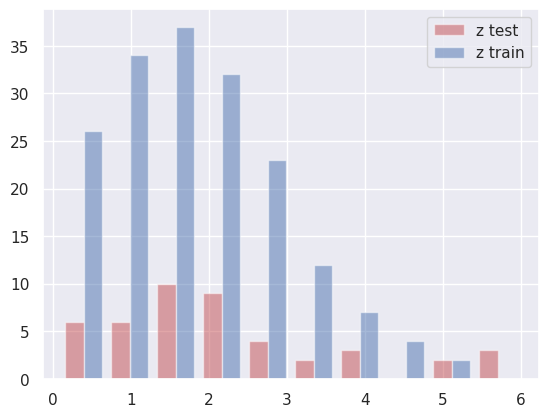

In [9]:
import seaborn as sns

sns.set_theme()  # <-- This actually changes the look of plots.
plt.hist([GRB.model.y_test, GRB.model.y_train], color=['r','b'], alpha=0.5, label=['z test', 'z train'])
plt.legend(loc='best')